In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from xmat_pnnl_code import ProcessData
from xmat_pnnl_code import GBM
import shap
shap.initjs()

In [2]:
#Model data
path = '/Users/mamu867/PNNL_Code_Base/xmat-pnnl/data_processing/9Cr_data/LMP'
model = np.load(path + '/model_params.npy', allow_pickle=True)[()]
model = model['9Cr-001']

#C data
C_data = np.load(path + '/constant_matcher_score_lib.npy',
        allow_pickle=True)[()]
C_data = {k: v['C'] for k, v in C_data.items()}

#Load the 9Cr data
ID = [1, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
      43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60,
      61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
      77, 78, 79, 82]
ID = ['9Cr-{}'.format(str(i).zfill(3)) for i in ID]

path = '/Users/mamu867/PNNL_Code_Base/xmat-pnnl/data_processing/9Cr_data'
df = pd.read_csv(path + '/Cleaned_data.csv')
df = df[df.ID.isin(ID)]

ele = ['Fe', 'C', 'Cr', 'Mn', 'Si', 'Ni', 'Co', 'Mo', 'W', 'Nb', 'Al',
       'P', 'Cu', 'Ti', 'Ta', 'Hf', 'Re', 'V', 'B', 'N', 'O', 'S', 'Zr']
df[ele] = df[ele].fillna(0)

df['log_CT_CS'] = np.log(df['CT_CS'])

df['LMP_Model'] = df.apply(lambda x:
        1e-3 * x['CT_Temp'] * (np.log(x['CT_RT']) + C_data[x['ID']]), axis=1)

features = [i for i in df.columns if i not in ['CT_RT', 'CT_Temp',
    'ID', 'CT_CS', 'LMP_Model']]
X = df[features].to_numpy(np.float32)
y = df['LMP_Model'].to_numpy(np.float32)

pdata = ProcessData(X=X, y=y, features=features)
pdata.clean_data()
data = pdata.get_data()
scale = pdata.scale
del pdata

'''
parameters_grid = {'boosting_type': ['gbdt', 'goss'],
              'num_leaves': [100, 200],
              'max_depth': [-1],
              'learning_rate': [0.01],
              'n_estimators': [100, 200],
              'subsample_for_bin': [200000],
              'objective': [None],
              'class_weight': [None],
              'min_split_gain': [0.0],
              'min_child_weight': [0.001],
              'min_child_samples': [20],
              'subsample': [1.0],
              'subsample_freq': [0],
              'colsample_bytree': [1.0],
              'reg_alpha': [0.0],
              'reg_lambda': [0.0],
              'random_state': [42],
              'n_jobs': [-1],
              'silent': [True],
              'importance_type' : ['split'],
              'num_boost_round': [2000],
              'tree_learner': ['serial', 'feature', 'data', 'voting'],
              'boost_from_average': [True, False],
              'alpha': [0.1, 0.5, 0.9, 1.0]}
              #'bagging_fraction': [0.2]}

lgb = LGBM(X=X,
           y=y,
           cv=5,
           grid_search=True,
           eval_metric='rmse',
           param_grid=parameters_grid)

lgb.run_model()
print(lgb.__dict__)
'''

parameters = {'iterations': None,
              'learning_rate': None,
              'depth': None,
              'l2_leaf_reg': None,
              'model_size_reg': None,
              'rsm': None,
              'loss_function': 'RMSE',
              'border_count': None,
              'feature_border_type': None,
              'per_float_feature_quantization': None,
              'input_borders': None,
              'output_borders': None,
              'fold_permutation_block': None,
              'od_pval': None,
              'od_wait': None,
              'od_type': None,
              'nan_mode': None,
              'counter_calc_method': None,
              'leaf_estimation_iterations': None,
              'leaf_estimation_method': None,
              'thread_count': None,
              'random_seed': None,
              'use_best_model': None,
              'best_model_min_trees': None,
              'custom_metric': None,
              'eval_metric': None,
              'bagging_temperature': None,
              'boosting_type': None,
              'bootstrap_type': None,
              'subsample': None,
              'max_depth': None,
              'n_estimators': None,
              'num_boost_round': None,
              'num_trees': None,
              'reg_lambda': None,
              'objective': None,
              'eta': None,
              'early_stopping_rounds': None,
              'cat_features': None,
              'grow_policy': None,
              'min_data_in_leaf': None,
              'min_child_samples': None,
              'max_leaves': None,
              'num_leaves': None,
              'score_function': None,
              'leaf_estimation_backtracking': None,
              'ctr_history_unit': None,
              'monotone_constraints': None}


xgb = GBM(package='catboost',
          X=data['X'],
          y=data['y'],
          cv=5,
          test_size=0.2,
          grid_search=False,
          eval_metric='rmse',
          parameters=parameters)

xgb.run_model()
print(xgb.__dict__)



Running Validation 0 of 5
0:	learn: 2.5150314	test: 2.3742509	best: 2.3742509 (0)	total: 59.4ms	remaining: 59.3s
1:	learn: 2.4529901	test: 2.3148521	best: 2.3148521 (1)	total: 60.9ms	remaining: 30.4s
2:	learn: 2.3929789	test: 2.2568706	best: 2.2568706 (2)	total: 62.4ms	remaining: 20.7s
3:	learn: 2.3359614	test: 2.2049079	best: 2.2049079 (3)	total: 63.7ms	remaining: 15.8s
4:	learn: 2.2859520	test: 2.1606631	best: 2.1606631 (4)	total: 65.8ms	remaining: 13.1s
5:	learn: 2.2339652	test: 2.1127093	best: 2.1127093 (5)	total: 67.1ms	remaining: 11.1s
6:	learn: 2.1804460	test: 2.0612170	best: 2.0612170 (6)	total: 68.4ms	remaining: 9.71s
7:	learn: 2.1415737	test: 2.0251139	best: 2.0251139 (7)	total: 69.6ms	remaining: 8.63s
8:	learn: 2.0921183	test: 1.9789796	best: 1.9789796 (8)	total: 70.9ms	remaining: 7.8s
9:	learn: 2.0425664	test: 1.9340535	best: 1.9340535 (9)	total: 72.1ms	remaining: 7.13s
10:	learn: 1.9935643	test: 1.8876755	best: 1.8876755 (10)	total: 73.3ms	remaining: 6.59s
11:	learn: 1.952

In [3]:
explainer = shap.TreeExplainer(xgb.model)
shap_values = explainer.shap_values(data['X'])

XX = scale.inverse_transform(data['X'])
X = pd.DataFrame(XX, columns=data['features'])
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:],
        X.iloc[0,:])

In [4]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

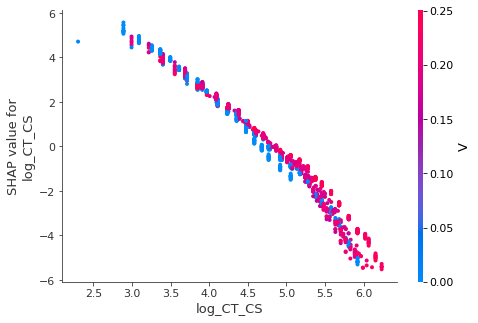

In [6]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("log_CT_CS", shap_values, X)

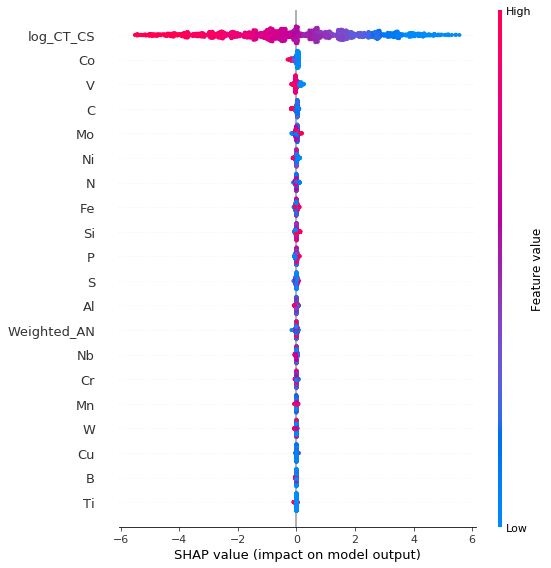

In [7]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

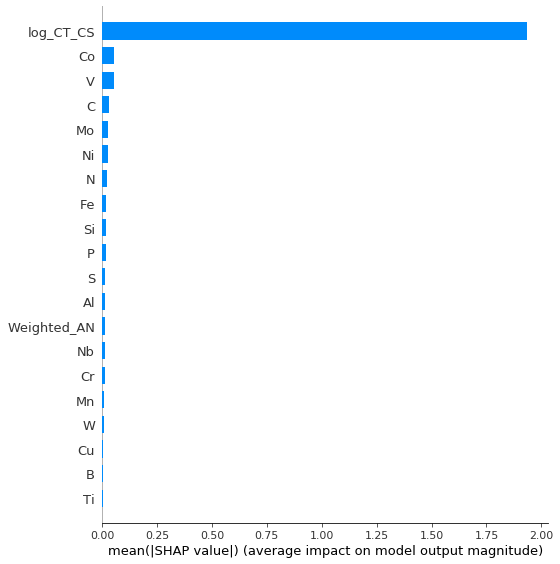

In [8]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X, plot_type="bar")

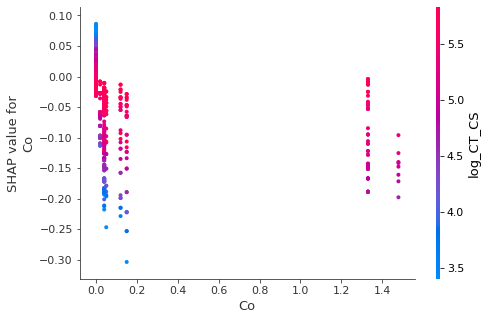

In [9]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Co", shap_values, X)

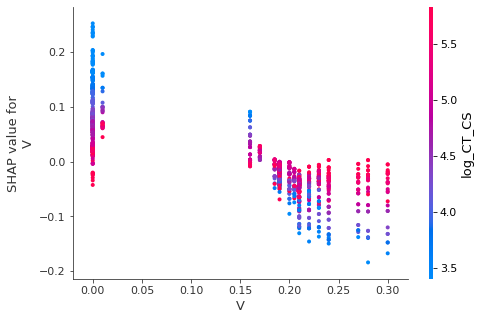

In [10]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("V", shap_values, X)

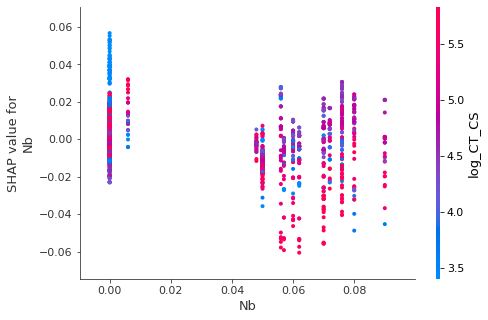

In [11]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Nb", shap_values, X)

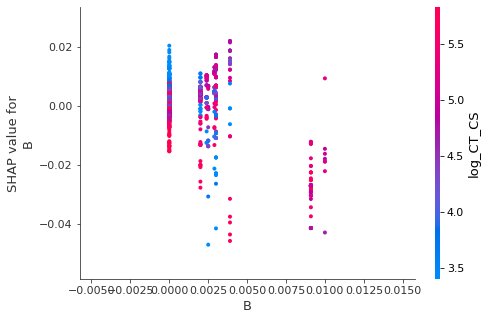

In [12]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("B", shap_values, X)

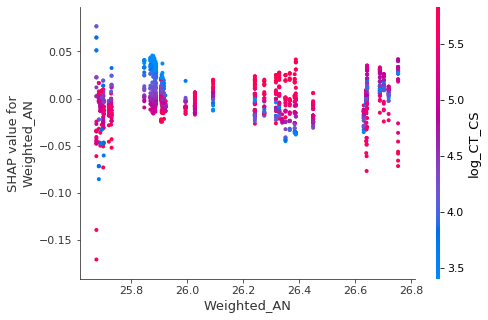

In [13]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Weighted_AN", shap_values, X)

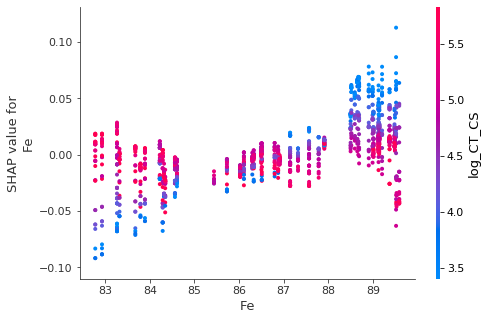

In [14]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Fe", shap_values, X)

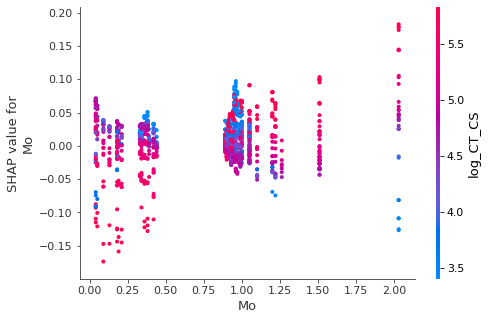

In [15]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Mo", shap_values, X)

In [21]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.decision_plot(explainer.expected_value, explainer.shap_values(), data['features'])

TypeError: shap_values() missing 1 required positional argument: 'X'

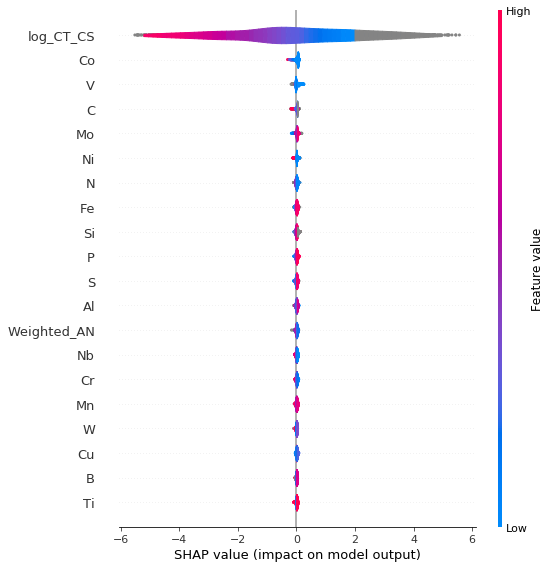

In [22]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X, plot_type='violin')